# 차원축소 Assignment2_Tobigs14_이혜린

## MNIST data에 적용을 해보기 (╹◡╹)

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [168]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import warnings

warnings.filterwarnings('ignore')

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

In [3]:
# 데이터 정보!
# 7만개의 작은 숫자 이미지
# 행 열이 반대로 되어있음 -> 전치
# grayscale 28x28 pixel = 784 feature
# 각 pixel은 0~255의 값
# label = 1~10 label이 총 10개인거에 주목하자

In [4]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [5]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [7]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

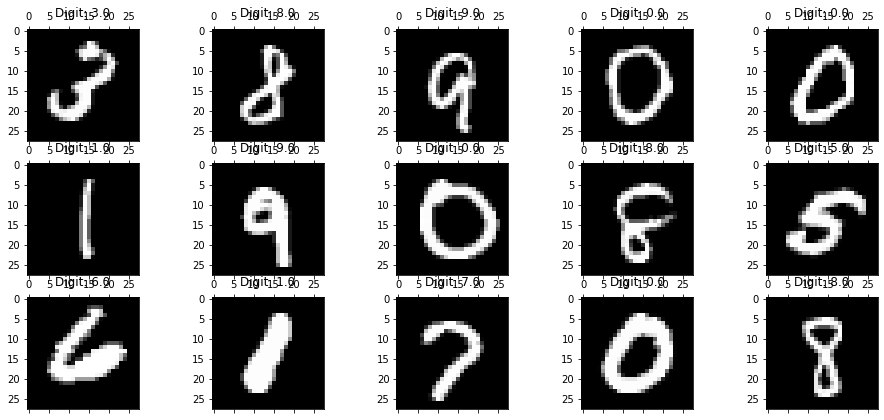

In [14]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['y'], axis=1), df['y'], test_size=0.2, random_state=123)

In [142]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(56000, 784) (14000, 784)
(56000,) (14000,)


### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!
강의에서 배웠던 3가지 중 어떤 걸 고려하였는지요! 
scree plot같은거는 직접 그려봐도 좋겠죠 ㅎㅎㅎ

#### PCA로 주성분 개수 정하기

In [129]:
from sklearn.decomposition import PCA

In [131]:
pca = PCA()
pca.fit(X_train)
var_cum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(var_cum > 0.8) + 1  # 설명하려하는 분산의 비율 80%
print(d)

43


분산의 80%를 설명하기 위해 필요한 주성분 개수는 **43개**이다.

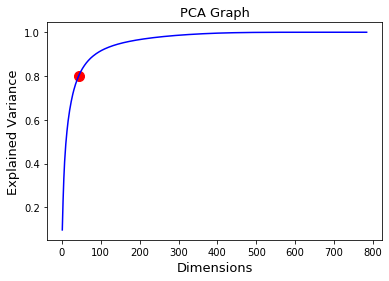

In [132]:
plt.plot(list(range(1, 1+len(var_cum))), var_cum, color='b')
plt.title('PCA Graph', fontsize=13)
plt.xlabel('Dimensions', fontsize=13)
plt.ylabel('Explained Variance', fontsize=13)
plt.scatter(d, 0.8, s=100, c='red')
plt.show()

#### PCA로 차원 축소한 결과

In [133]:
pca_final=PCA(n_components=43)
X_train_pca = pca_final.fit_transform(X_train) # 주성분 43개로 차원 축소된 X_train

In [134]:
X_test_pca = pca_final.transform(X_test) # 주성분 43개로 차원 축소된 X_test

#### LDA로 주성분 개수 정하기

In [136]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [137]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
var_cum_lda = np.cumsum(lda.explained_variance_ratio_)
d = np.argmax(var_cum_lda>0.8)+1 # 설명 하려는 분산의 비율 80%
print(d)

5


분산의 80%를 설명하기 위해 필요한 주성분 개수는 **5개**이다.

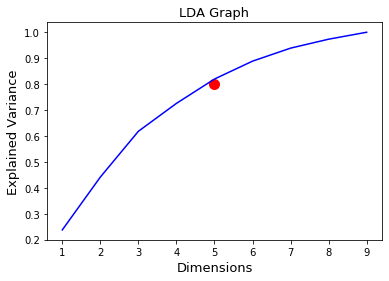

In [139]:
plt.plot(list(range(1, 1+len(var_cum_lda))), var_cum_lda, color='b')
plt.title('LDA Graph', fontsize=13)
plt.xlabel('Dimensions', fontsize=13)
plt.ylabel('Explained Variance', fontsize=13)
plt.scatter(d, 0.8, s=100, c='red')
plt.show()

#### LDA로 차원축소한 결과

In [140]:
lda_final = LinearDiscriminantAnalysis(n_components=5)
X_train_lda = lda_final.fit_transform(X_train, y_train) # 주성분 5개로 차원 축소된 X_train (fit 할 때 y_train 필요)

In [141]:
X_test_lda = lda_final.transform(X_test) # 주성분 5개로 차원 축소된 X_test (fit 할 때 y_train 필요)

#### PCA와 비교하기 위해, 주성분 개수가 43개인 dataset을 따로 생성한다.

In [169]:
lda_extra = LinearDiscriminantAnalysis(n_components=43)
X_train_extra = lda_extra.fit_transform(X_train, y_train) # 주성분 43개로 차원 축소된 X_train (fit 할 때 y_train 필요)
X_test_extra = lda_extra.transform(X_test) # 주성분 43개로 차원 축소된 X_test (fit 할 때 y_train 필요)

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

### RandomForest

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

#### RandomForest with Original data (Dimension 784)

In [144]:
rf_original = RandomForestClassifier(n_estimators=100)
rf_o0 = time.time()
rf_original.fit(X_train, y_train)
rf_o1 = time.time()

In [145]:
print('Training Time : {:.4f}s'.format(rf_o1 - rf_o0))

Training Time : 195.1622s


In [146]:
rf_pred_original = rf_original.predict(X_test)
rf_accuracy_original = accuracy_score(y_test, rf_pred_original)
rf_accuracy_original

0.9680714285714286

#### RandomForest with PCA data (Dimension 43)

In [147]:
rf_pca = RandomForestClassifier(n_estimators=100)
rf_p0 = time.time()
rf_pca.fit(X_train_pca, y_train)
rf_p1 = time.time()

In [148]:
print('Training Time : {:.4f}s'.format(rf_p1-rf_p0))

Training Time : 244.4933s


In [149]:
rf_pred_pca = rf_pca.predict(X_test_pca)
rf_accuracy_pca = accuracy_score(y_test, rf_pred_pca)
rf_accuracy_pca

0.9549285714285715

#### RandomForest with LDA data  (Dimension 5)

In [150]:
rf_lda = RandomForestClassifier(n_estimators=100)
rf_l0 = time.time()
rf_lda.fit(X_train_lda, y_train)
rf_l1 = time.time()

In [151]:
print('Training Time : {:.4f}s'.format(rf_l1-rf_l0))

Training Time : 81.8522s


In [152]:
rf_pred_lda = rf_lda.predict(X_test_lda)
rf_accuracy_lda = accuracy_score(y_test, rf_pred_lda)
rf_accuracy_lda

0.8427857142857142

#### RandomForest with LDA data  (Dimension 43)

In [155]:
rf_extra = RandomForestClassifier(n_estimators=100)
rf_e0 = time.time()
rf_extra.fit(X_train_extra, y_train)
rf_e1 = time.time()

In [158]:
print('Training Time : {:.4f}s'.format(rf_e1-rf_e0))

Training Time : 127.0823s


In [159]:
rf_pred_extra = rf_extra.predict(X_test_extra)
rf_accuracy_extra = accuracy_score(y_test, rf_pred_extra)
rf_accuracy_extra

0.9122142857142858

### LogisticRegression

#### LogisticRegression with Original data (Dimension 784)

In [157]:
from sklearn.linear_model import LogisticRegression

In [170]:
lr_original = LogisticRegression()
lr_o0 = time.time()
lr_original.fit(X_train, y_train)
lr_o1 = time.time()

In [161]:
print('Training Time : {:.4f}s'.format(lr_o1-lr_o0))

Training Time : 30.1594s


In [162]:
lr_pred_original = lr_original.predict(X_test)
lr_accuracy_original = accuracy_score(y_test, lr_pred_original)
lr_accuracy_original

0.9202142857142858

#### LogisticRegression with PCA data (Dimension 43)

In [171]:
lr_pca = LogisticRegression()
lr_p0 = time.time()
lr_pca.fit(X_train_pca, y_train)
lr_p1 = time.time()

In [172]:
print('Training Time : {:.4f}s'.format(lr_p1-lr_p0))

Training Time : 7.1289s


In [174]:
lr_pred_pca = lr_pca.predict(X_test_pca)
lr_accuracy_pca = accuracy_score(y_test, lr_pred_pca)
lr_accuracy_pca

0.9045

#### LogisticRegression with LDA data (Dimension 5)

In [175]:
lr_lda = LogisticRegression()
lr_l0 = time.time()
lr_lda.fit(X_train_lda, y_train)
lr_l1 = time.time()

In [176]:
print('Training Time : {:.4f}s'.format(lr_l1-lr_l0))

Training Time : 8.2290s


In [181]:
lr_pred_lda = lr_lda.predict(X_test_lda)
lr_accuracy_lda = accuracy_score(y_test, lr_pred_lda)
lr_accuracy_lda

0.8294285714285714

#### LogisticRegression with LDA data (Dimension 43)

In [179]:
lr_extra = LogisticRegression()
lr_e0 = time.time()
lr_extra.fit(X_train_extra, y_train)
lr_e1 = time.time()

In [180]:
print('Training Time : {:.4f}s'.format(lr_e1-lr_e0))

Training Time : 8.0465s


In [182]:
lr_pred_extra = lr_extra.predict(X_test_extra)
lr_accuracy_extra = accuracy_score(y_test, lr_pred_extra)
lr_accuracy_extra

0.8852857142857142

## SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_original = SVC()
svm_o0 = time.time()
svm_original.fit(X_train, y_train)
svm_o1 = time.time()

### KNN

In [183]:
from sklearn.neighbors import KNeighborsClassifier

#### KNN with original data (Dimension 784)

In [185]:
kn_original = KNeighborsClassifier()
kn_o0 = time.time()
kn_original.fit(X_train, y_train)
kn_o1 = time.time()

In [186]:
print('Training Time : {:.4f}s'.format(kn_o1 - kn_o0))

Training Time : 153.2114s


In [ ]:
kn_pred_original = kn_original.predict(X_test)
kn_accuracy_original = accuracy_score(y_test, kn_pred_original)
kn_accuracy_original

#### KNN with PCA data (Dimension 43)

In [ ]:
kn_pca = KNeighborsClassifier()
kn_p0 = time.time()
kn_pca.fit(X_train_pca, y_train)
kn_p1 = time.time()

In [ ]:
print('Training Time : {:.4f}s'.format(kn_p1 - kn_p0))

In [ ]:
kn_pred_pca = kn_pca.predict(X_test_pca)
kn_accuracy_pca = accuracy_score(y_test, kn_pred_pca)
kn_accuracy_pca

#### KNN with LDA data (Dimension 5)

In [ ]:
kn_lda = KNeighborsClassifier()
kn_l0 = time.time()
kn_lda.fit(X_train_lda, y_train)
kn_l1 = time.time()

In [ ]:
print('Training Time : {:.4f}s'.format(kn_l1 - kn_l0))

In [ ]:
kn_pred_lda = kn_lda.predict(X_test_lda)
kn_accuracy_lda = accuracy_score(y_test, kn_pred_lda)
kn_accuracy_lda

#### KNN with LDA data (Dimension 43)

In [ ]:
kn_extra = KNeighborsClassifier()
kn_e0 = time.time()
kn_extra.fit(X_train_extra, y_train)
kn_e1 = time.time()

In [ ]:
print('Training Time : {:.4f}s'.format(kn_e1 - kn_e0))

In [ ]:
kn_pred_extra = kn_extra.predict(X_test_extra)
kn_accuracy_extra = accuracy_score(y_test, kn_pred_extra)
kn_accuracy_extra

## Final Result

### RandomForest  
  
  
Data | Dimension | Training Time | Accuracy
:-:|:-:|:-:|:-:
Original| 784 | 195.1622s | 0.968
PCA | 43 | 244.4933s | 0.955
LDA | 5 | 81.8522s | 0.843
LDA | 43 | 127.0823s | 0.912

### LogisticRegression  
  
  
Data | Dimension | Training Time | Accuracy
:-:|:-:|:-:|:-:
Original| 784 | 30.1594s | 0.92
PCA | 43 | 7.1289s | 0.904
LDA | 5 | 8.229s | 0.829
LDA | 43 | 8.0465s | 0.885

### KNN
  
  
Data | Dimension | Training Time | Accuracy
:-:|:-:|:-:|:-:
Original| 784 |  | 
PCA | 43 |  | 
LDA | 5 | |
LDA | 43 | | 